Project 3 

Austin Brooks

DAWI 4/2/2021

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Training the Breast-Cancer dataset

--  I found more documentation on the diabetes dataset, with data and feature visualization information. 

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

Here is an example of the diabetes sk dataset I attempted to use as well including many data visualization examples

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

In [ ]:
cancer = load_breast_cancer() # This can be changed to your own data
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, 
                                                            test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, 
                                                  test_size=0.2, random_state=42)


x train shape values

In [ ]:
print(x_train.shape, x_val.shape)

(364, 30) (91, 30)


In [ ]:
print(x_train.shape, x_test.shape)

(364, 30) (114, 30)


In [ ]:
print(x_train_all.shape, x_test.shape)

(455, 30) (114, 30)


In [ ]:
print(x_train_all.shape, x_val.shape)

(455, 30) (91, 30)


In [ ]:
y train shape values

In [ ]:
print(y_train.shape, y_val.shape)

(318,) (80,)


In [ ]:
print(y_train.shape, y_test.shape)

(318,) (100,)


In [ ]:
print(y_train_all.shape, y_test.shape)

(398,) (100,)


In [ ]:
print(y_train_all.shape, y_val.shape)

(398,) (80,)


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
lr = linear_model.LinearRegression()

Even though we are only taking 0 and 1,this chart would be useful in cross validation so I included it with this dataset for future reference and learning.

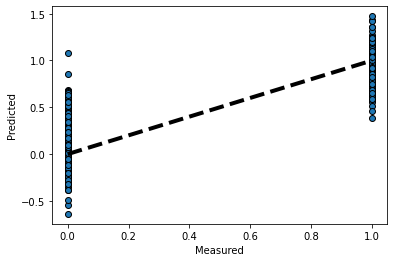

In [ ]:
predicted = cross_val_predict(lr, x, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Applying the standard scaler to scale the dataset and apply to fit model for overall score

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, ), activation='logistic',
                    solver='sgd', alpha=0.01, batch_size=32,
                    learning_rate_init=0.1, max_iter=1000)
mlp.fit(x_train_scaled, y_train)
mlp.score(x_val_scaled, y_val)

0.989010989010989

In [ ]:
scaler = StandardScaler()
scaler.fit(x_test)
x_test_scaled = scaler.transform(x_test)

Prediction Test of the x tested data.

We can see that only one model in the array is wrong giving us a high prediction score

In [ ]:
prediction_test = mlp.predict(x_test_scaled)
prediction_test
#mlp.predict_proba(x_test_scaled)

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1])

In [ ]:
y_test

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1])

In [ ]:
mlp.score(x_test_scaled, y_test)

0.9824561403508771

In [ ]:
from sklearn.metrics import confusion_matrix

Applying the confusion metrix

In [ ]:
confusion_matrix(prediction_test, y_test)

array([[41,  1],
       [ 1, 71]])

Finding:

True positive (tp)

True negative (tn)

False Positive (fp)

False Negative (fn)

In [ ]:
tn, fp, fn, tp = confusion_matrix(prediction_test, y_test).ravel()
(tn, fp, fn, tp)

(41, 1, 1, 71)

In [ ]:
(tp+tn)/(tp+tn+fp+fn)

0.9824561403508771

In [ ]:
# Recall
(tp)/(tp+fn)
# Precision
(tp)/(tp+fp)
# TNR
(tn)/(tn+fp)
# F1 Score

0.9761904761904762

Here is were we enter in the Apena data for extraction

Load Extracted Features

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DAWI_Apnea_Features_V2.csv to DAWI_Apnea_Features_V2.csv


View of the dataset. 

Applyed basic annotations to each feature and our last feature Apena for extraction

In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded['DAWI_Apnea_Features_V2.csv'].decode('utf-8')))
df




,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,Apena
0,15,100625,6708.333333,4648.532067,15342,0,6273.0,2.206384,0.228458,2912,194.133333,109.329689,349,0,164.0,2.109335,-0.254629,0
1,19,115526,6080.315789,3058.787615,10785,0,6251.0,2.575502,-0.464226,3274,172.315789,90.604791,344,0,159.0,2.633273,-0.069329,0
2,21,125263,5964.904762,8372.466141,28683,0,895.0,3.634642,1.298441,2985,142.142857,152.074089,474,0,64.0,2.736737,1.012667,0
3,21,106683,5080.142857,6154.919596,21689,0,2487.0,3.529734,1.126890,2902,138.190476,164.061153,664,0,74.0,5.929711,1.706555,0
4,18,95201,5288.944444,4888.938878,13928,0,3568.0,1.805114,0.485112,3258,181.000000,137.614979,394,0,156.5,1.505151,0.228788,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,23,102407,4452.478261,5129.966648,18037,0,2196.0,3.919340,1.466569,2813,122.304348,63.795436,229,0,144.0,2.364280,-0.539491,1
494,25,75749,3029.960000,3675.058486,14568,0,2200.0,6.603483,2.060178,2597,103.880000,55.901193,214,0,119.0,2.551887,-0.557078,1
495,23,90908,3952.521739,5969.427678,21844,0,1643.0,5.583934,1.956528,2753,119.695652,84.657833,339,0,121.0,3.593550,0.732469,1
496,22,117803,5354.681818,6303.823960,20205,0,2072.0,3.443025,1.327323,2957,134.409091,89.097945,454,0,129.0,8.958628,1.818306,1


Describes the dataset

In [ ]:

df.describe()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,Apena
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.0,498.000000,498.000000,498.000000,498.000000
mean,30.343373,91398.445783,3407.426041,5205.333080,20678.192771,-0.174699,1547.397590,8.429182,2.232378,2720.120482,98.685380,80.442202,323.506024,0.0,90.515060,5.012947,0.889945,0.921687
std,10.209307,33893.267471,1811.310266,2246.416944,9217.840073,2.246303,1718.807495,6.321121,1.119216,244.255946,31.806822,28.850906,144.055436,0.0,42.049856,4.717868,1.188723,0.268934
min,15.000000,28425.000000,568.500000,1167.110206,4774.000000,-29.000000,17.000000,1.251386,-0.745117,1812.000000,29.146067,39.258627,149.000000,0.0,9.000000,1.387646,-1.861936,0.000000
25%,23.000000,66981.000000,2132.320000,3386.927154,13928.000000,0.000000,306.500000,4.231876,1.494451,2590.000000,78.281250,60.106948,204.000000,0.0,59.000000,2.076511,-0.025508,1.000000
50%,28.000000,88229.500000,3269.287097,5068.361666,18834.500000,0.000000,1403.000000,6.249545,2.100718,2699.500000,94.529178,71.093097,264.000000,0.0,98.000000,2.824566,0.639793,1.000000
75%,34.000000,110779.000000,4304.076923,6154.919596,25108.000000,0.000000,1936.000000,10.762811,2.907279,2832.000000,119.695652,94.121988,434.000000,0.0,119.000000,6.554025,1.778213,1.000000
max,89.000000,245873.000000,12940.684210,12362.097030,46440.000000,0.000000,14296.000000,39.754190,5.969523,3526.000000,209.500000,192.455493,784.000000,0.0,234.000000,30.331545,5.080252,1.000000


Shape of dataset

In [ ]:
df.shape

(498, 18)

This is our counts of Normal or 0 and Apena or 1


In [ ]:
#df["Normal/Apena" ] = pd.DataFrame(data, columns=['Normal/Apena'])

count1 = df[df.Apena== 1].count()
count0 = df[df.Apena== 0].count()
print (count1)
print (count0)
print ((count0/(count1 + count0) ) *100)

a        459
b        459
c        459
d        459
e        459
f        459
g        459
h        459
i        459
j        459
k        459
l        459
m        459
n        459
o        459
p        459
q        459
Apena    459
dtype: int64
a        39
b        39
c        39
d        39
e        39
f        39
g        39
h        39
i        39
j        39
k        39
l        39
m        39
n        39
o        39
p        39
q        39
Apena    39
dtype: int64
a        7.831325
b        7.831325
c        7.831325
d        7.831325
e        7.831325
f        7.831325
g        7.831325
h        7.831325
i        7.831325
j        7.831325
k        7.831325
l        7.831325
m        7.831325
n        7.831325
o        7.831325
p        7.831325
q        7.831325
Apena    7.831325
dtype: float64


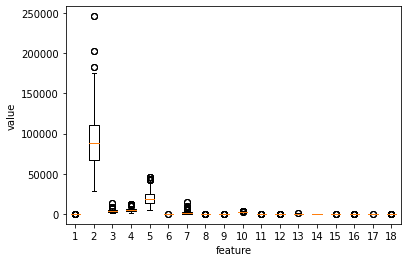

array([[1.46556743e-04, 9.83151486e-01, 6.55434324e-02, ...,
        0.00000000e+00, 1.60235373e-03, 2.06091527e-05],
       [1.63170546e-04, 9.92128450e-01, 5.22172868e-02, ...,
        0.00000000e+00, 1.36547984e-03, 2.26143510e-05],
       [1.62848466e-04, 9.71375590e-01, 4.62559805e-02, ...,
        0.00000000e+00, 4.96300087e-04, 2.12225441e-05],
       ...,
       [2.45137491e-04, 9.68911264e-01, 4.21265767e-02, ...,
        0.00000000e+00, 1.28963637e-03, 3.83005988e-05],
       [1.83540660e-04, 9.82801835e-01, 4.46728107e-02, ...,
        0.00000000e+00, 1.07621569e-03, 7.47396604e-05],
       [6.06187286e-04, 9.44256526e-01, 2.19594541e-02, ...,
        0.00000000e+00, 5.07505635e-04, 1.13544003e-04]])

In [ ]:
dft = np.transpose(df)

plt.boxplot(dft)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

x1 = dft.iloc[0:16,:]
y1 = dft.iloc[17,:]
x1 = np.transpose(x1)
from sklearn import preprocessing


# normalize the data attributes
x1 = preprocessing.normalize(x1)
x1

Train the dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, stratify=y1, test_size=0.2, random_state=42)

In [ ]:
x_train_all, x_test, y_train_all, y_test = train_test_split(x1, y1, stratify=y1, 
                                                            test_size=0.2, random_state=42)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, 
                                                  test_size=0.2, random_state=42)

x train shape value

In [ ]:
print(x_train.shape, x_val.shape)

(318, 16) (80, 16)


In [ ]:
print(x_train.shape, x_test.shape)

In [ ]:
print(x_train_all.shape, x_test.shape)

In [ ]:
print(x_train_all.shape, x_val.shape)

y train shape value

In [ ]:
print(y_train.shape, y_val.shape)

In [ ]:
print(y_train.shape, y_test.shape)

In [ ]:
print(y_train_all.shape, y_test.shape)

In [ ]:
print(y_train_all.shape, y_val.shape)

Applying standard scaler adn applying prediction test

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, ), activation='logistic',
                    solver='sgd', alpha=0.01, batch_size=32,
                    learning_rate_init=0.1, max_iter=1000)
mlp.fit(x_train_scaled, y_train)
mlp.score(x_val_scaled, y_val)

1.0

In [ ]:
scaler = StandardScaler()
scaler.fit(x_test)
x_test_scaled = scaler.transform(x_test)

In [ ]:
prediction_test = mlp.predict(x_test_scaled)
prediction_test
mlp.predict_proba(x_test_scaled)

array([[3.02067663e-05, 9.99969793e-01],
       [2.84251232e-03, 9.97157488e-01],
       [8.45838083e-07, 9.99999154e-01],
       [9.40507368e-01, 5.94926321e-02],
       [2.45662304e-04, 9.99754338e-01],
       [1.39100191e-01, 8.60899809e-01],
       [2.09581553e-03, 9.97904184e-01],
       [7.87907219e-03, 9.92120928e-01],
       [3.18694088e-06, 9.99996813e-01],
       [9.71728745e-04, 9.99028271e-01],
       [2.27131203e-04, 9.99772869e-01],
       [3.62146811e-05, 9.99963785e-01],
       [1.67774307e-05, 9.99983223e-01],
       [8.21335626e-04, 9.99178664e-01],
       [2.84251232e-03, 9.97157488e-01],
       [1.67774307e-05, 9.99983223e-01],
       [8.80208607e-05, 9.99911979e-01],
       [8.59152524e-03, 9.91408475e-01],
       [6.98818558e-04, 9.99301181e-01],
       [5.79827675e-04, 9.99420172e-01],
       [3.54009237e-04, 9.99645991e-01],
       [2.38902181e-03, 9.97610978e-01],
       [9.53532822e-03, 9.90464672e-01],
       [2.41708486e-04, 9.99758292e-01],
       [1.507273

In [ ]:
y_test

285    1.0
382    1.0
187    1.0
334    0.0
60     1.0
      ... 
277    1.0
329    1.0
56     1.0
417    1.0
233    1.0
Name: Apena, Length: 100, dtype: float64

In [ ]:
mlp.score(x_test_scaled, y_test)

1.0

In [ ]:
from sklearn.metrics import confusion_matrix

Confusion Metric applyed

In [ ]:
confusion_matrix(prediction_test, y_test)

array([[ 8,  0],
       [ 0, 92]])

Finding:

True positive (tp)

True negative (tn)

False Positive (fp)

False Negative (fn)

In [ ]:
tn, fp, fn, tp = confusion_matrix(prediction_test, y_test).ravel()
(tn, fp, fn, tp)

(8, 0, 0, 92)

In [ ]:
(tp+tn)/(tp+tn+fp+fn)

1.0

In [ ]:
# Recall
(tp)/(tp+fn)
# Precision
(tp)/(tp+fp)
# TNR
(tn)/(tn+fp)
# F1 Score

1.0

In [ ]:
np.unique(y_train, return_counts=True)

(array([0., 1.]), array([ 25, 293]))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Appyling the trained dataset to Logistic Regression model for accuracy, precision, recall, and f1 score


In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

print(model.score(x_test, y_test))
y_pred = model.predict(x_test)
print("accuracy:", accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("f1 score:", f1_score(y_test, y_pred))

0.92
accuracy: 0.92
precision: 0.92
recall: 1.0
f1 score: 0.9583333333333334


Appying trained dataset to a logistic Neuron to find mean, median, standard deviation, and precentile

In [ ]:
class LogisticNeuron:
    
    def __init__(self):
        self.w = None
        self.b = None

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b  # 
        return z

    def backprop(self, x, err):
        w_grad = x * err    # 
        b_grad = 1 * err    # 
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None) # 
        a = 1 / (1 + np.exp(-z))  # 
        return a
        
    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])      # 
        self.b = 0                        # 
        for i in range(epochs):           # Repeat epochs
            for x_i, y_i in zip(x, y):    # 
                z = self.forpass(x_i)     # 
                a = self.activation(z)    # 
                err = -(y_i - a)          # 
                w_grad, b_grad = self.backprop(x_i, err) # 
                self.w -= w_grad          # 
                self.b -= b_grad          # 
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]    # 
        a = self.activation(np.array(z))        # 
        return a > 0.5

In [ ]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

In [ ]:
np.mean(neuron.predict(x_test) == y_test)

0.92

In [ ]:
np.median(neuron.predict(x_test) == y_test)

1.0

In [ ]:
np.percentile(neuron.predict(x_test) == y_test, 25)

1.0

In [ ]:
np.percentile(neuron.predict(x_test) == y_test, 50)

1.0

In [ ]:
np.percentile(neuron.predict(x_test) == y_test, 75)

1.0

In [ ]:
np.std(neuron.predict(x_test) == y_test)

0.2712931993250107

In [ ]:
np.var(neuron.predict(x_test) == y_test)

0.0736

In [ ]:
neuron.predict((x[0]))

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
from sklearn.linear_model import SGDClassifier

SGD classifier

In [ ]:
sgd = SGDClassifier(loss='log', max_iter=100, tol=1e-3, random_state=42)
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.92

In [ ]:
sgd.predict(x_test[0:10])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
lr = linear_model.LinearRegression()

Again implementing cross validation here for a reference to the model as it could be useful in the future. Our data target is not meant for this.

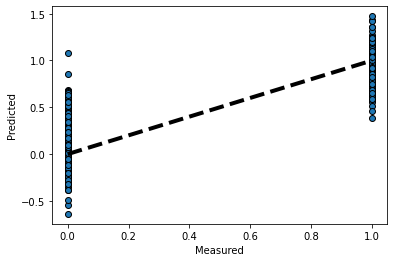

In [ ]:
predicted = cross_val_predict(lr, x, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Discussion


-- I was able to apply a regression model and a neuron model that allowed me to complete the calculations of recall, specificity, precision and accuracy. I am contacting you via email for help in hypertuning and synchronization. I attempt feature extraction through sliding window below and could use help understanding this further.  

-- My project shows implementation of calculating necessary informations, however without hyperparameter tuning and synchronization, my numbers come back similar to those in class. 

In [ ]:
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
from scipy.stats import kurtosis, skew

x = dft

x= 400 
k=0
kk =0
n = 10

for i in range(0, n - k + 1, step):
  window = x[i:i + k]
  peaks, _ = find_peaks(window, distance=150)
  ecg_peaks = window[peaks]


  if ecg_peaks.size == 0:
    kk += 1
    continue

  ecg_sample_time = peaks

In [ ]:

plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

In [ ]:
ecg_peaks

In [ ]:
ecg_sample_time

In [ ]:
fs = 360
ecg_sample_time = peaks / fs
ecg_sample_time

In [ ]:
fs = 360
#np.diff(peaks)
ecg_sample_time = peaks / fs
#ecg_sample_time
ecg_sample_time_interval = [ecg_sample_time[i + 1] - ecg_sample_time[i] for i in range(len(ecg_sample_time)-1)] 
#ecg_sample_time
ecg_sample_time_interval

Find mean of ECG interval

In [ ]:
np.mean(ecg_sample_time_interval)

Find median of ECG interval

In [ ]:
np.median(ecg_sample_time_interval)

Find standard deviation of ECG interval

In [ ]:
np.std(ecg_sample_time_interval)

Find Kurtosis of ECG interval

In [ ]:
kurtosis(ecg_sample_time_interval, fisher=True)

Find Scew of ECG interval

In [ ]:
skew(ecg_sample_time_interval)

Show peaks

In [ ]:
x[peaks]